In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

In [2]:
data=pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# <u>1. Data preprocessing</u>

1.1.<u>Dealing with missing values</u>

In [3]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<b>Let's fill missing values to the mean values for 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT'<b/>

In [4]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)

1.2. <u>Drop feataures</u>

In [5]:
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<b>The feature 'CUST_ID' is not necessary, so it will be dropped</b>

In [6]:
data.drop(columns='CUST_ID',inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


<b>From this output, it is noticed that the value for the feature 'PURCHASES' varies from 0 to 49039.57 and for some features like 'BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY' and 'PRC_FULL_PAYMENT', the values vary from 0 to 1. So it's necessary to scale all features on the same range.</b>

In [9]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

<b>In order to scale individual samples to have unit norm, it's necessary to proceed to a normalization operation. The output issued from this process is an array, then it will be converted to a dataframe.</b>

In [10]:
data_normalized=normalize(data_scaled)

In [11]:
df=pd.DataFrame(data_normalized)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.311938,-0.106297,-0.181072,-0.152108,-0.148760,-0.198921,-0.343687,-0.289212,-0.301422,-0.287801,-0.202878,-0.217905,-0.409290,-0.225425,-1.325192e-01,-0.223964,0.153704
1,0.219925,0.037539,-0.131222,-0.099749,-0.127037,0.728166,-0.341434,-0.189660,-0.256265,0.160401,0.030761,-0.165384,0.192448,0.228779,2.495877e-02,0.065457,0.100796
2,0.126682,0.146783,-0.030504,0.030850,-0.128790,-0.132249,0.359771,0.757440,-0.259802,-0.191339,-0.134880,-0.030888,0.234039,-0.108739,-2.880315e-02,-0.148899,0.102187
3,0.020589,-0.426439,0.097309,0.229034,-0.190618,-0.154587,-0.425253,-0.167447,-0.384524,-0.108570,-0.138184,-0.231288,0.346393,-0.251048,-1.841058e-16,-0.220379,0.151244
4,-0.151595,0.218909,-0.195238,-0.146744,-0.192075,-0.197234,-0.428504,-0.168727,-0.387463,-0.285359,-0.201157,-0.233056,-0.382591,-0.153959,-1.123064e-01,-0.222064,0.152400


<b>The normalized dataset is multidimensional because it contains 17 features, so let's reduce the dimensionality of the data to only two features .</b>

In [12]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df)
df_pca

array([[-0.48982553, -0.6796791 ],
       [-0.51879106,  0.54500746],
       [ 0.33088514,  0.26898045],
       ...,
       [ 0.18879821, -0.24849735],
       [-0.31301786, -0.17138277],
       [ 0.01292928,  0.09787389]])

In [13]:
# From this output, df_pca returns an array. So, it will be converted to a dataframe

df_principal=pd.DataFrame(df_pca)
df_principal.columns=['Feature_1','Feature_2']
df_principal.head()

,Feature_1,Feature_2
0,-0.489826,-0.679679
1,-0.518791,0.545007
2,0.330885,0.268980
3,-0.482374,-0.092114
4,-0.563289,-0.481915


# <u>2. Hierarchical clusters</u>

In [14]:
# Let's try the modelization with the number of clusters of 3

model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
clust_labels=model.fit_predict(df_principal)
clust_labels

array([0, 2, 1, ..., 0, 0, 1], dtype=int64)

In [15]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.head()

,0
0,0
1,2
2,1
3,0
4,0


# <u>3. Plot the clusters</u>

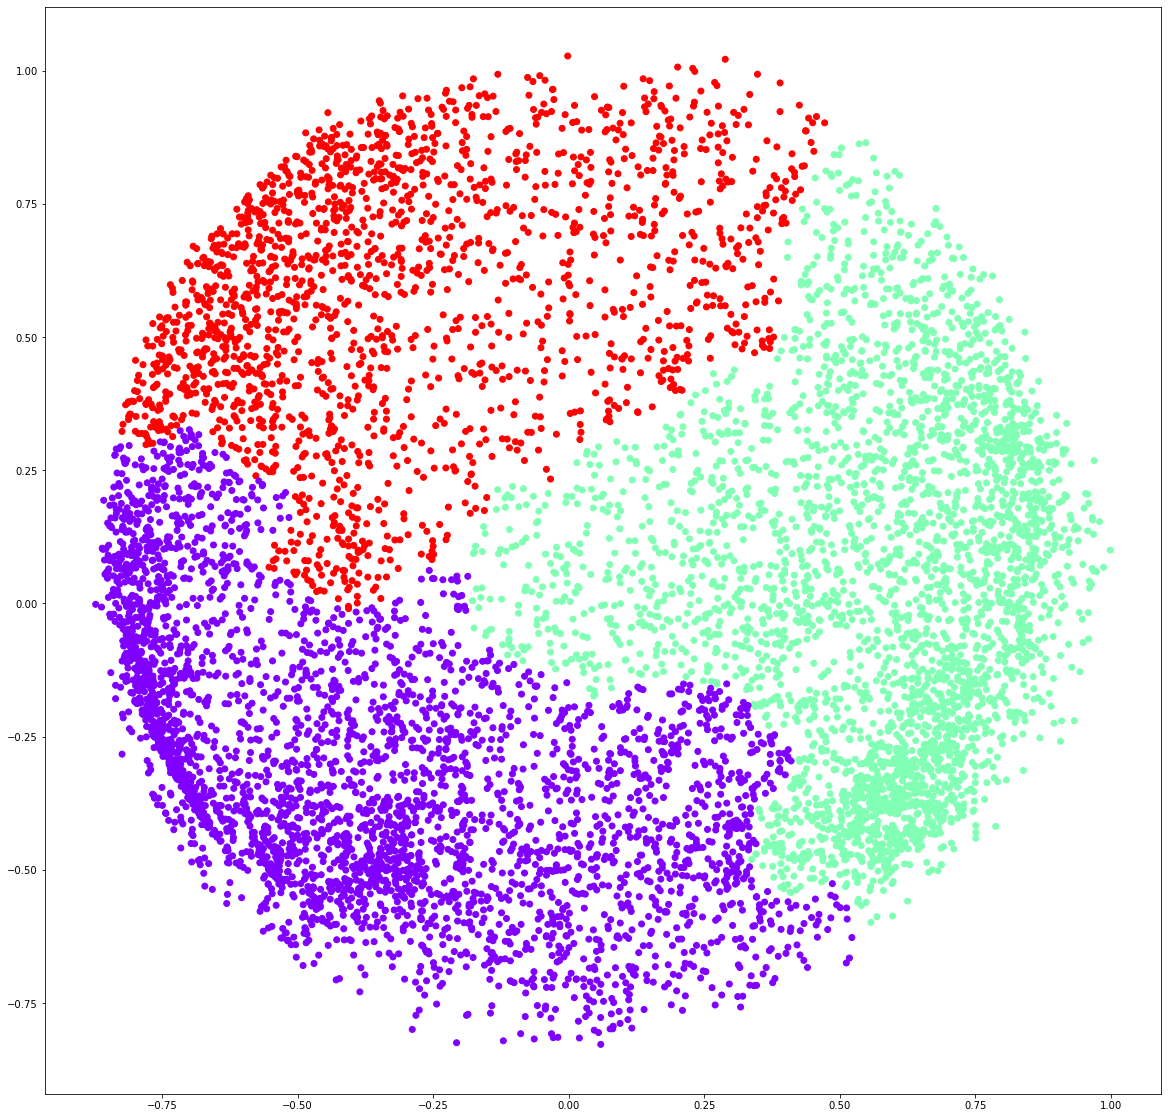

In [16]:
plt.figure(figsize=(20,20))
plt.scatter(df_principal['Feature_1'],df_principal['Feature_2'],c=clust_labels,cmap='rainbow')
plt.show()

# <u>4. Plot the dendrogram</u>

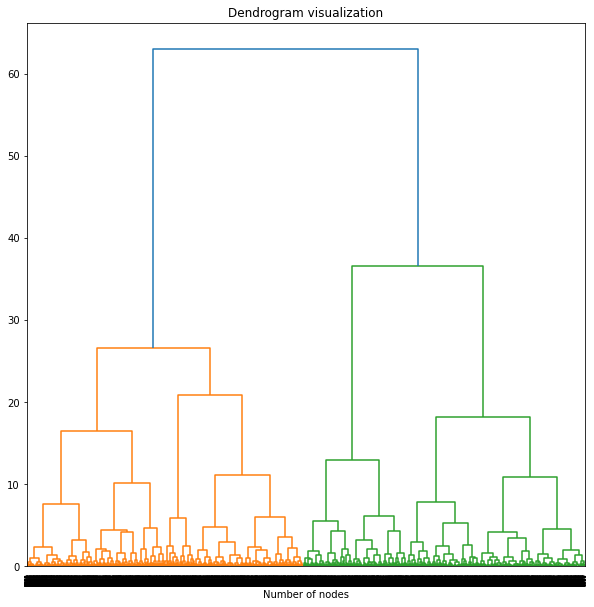

In [17]:
plt.figure(figsize=(10,10))
plt.title('Dendrogram visualization')
plt.xlabel('Number of nodes')
Dendrogram=dendrogram(linkage(df_principal,method='ward'))

# <u>5. Use K-means clustering</u>

<b>Let's start K-means clustering equals to 2</b>

In [18]:
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(df_principal)
label=kmeans.labels_

In [19]:
kmeans.predict(df_principal)
print(kmeans.cluster_centers_)

[[ 0.49326319 -0.00339775]
 [-0.46044291  0.00317167]]


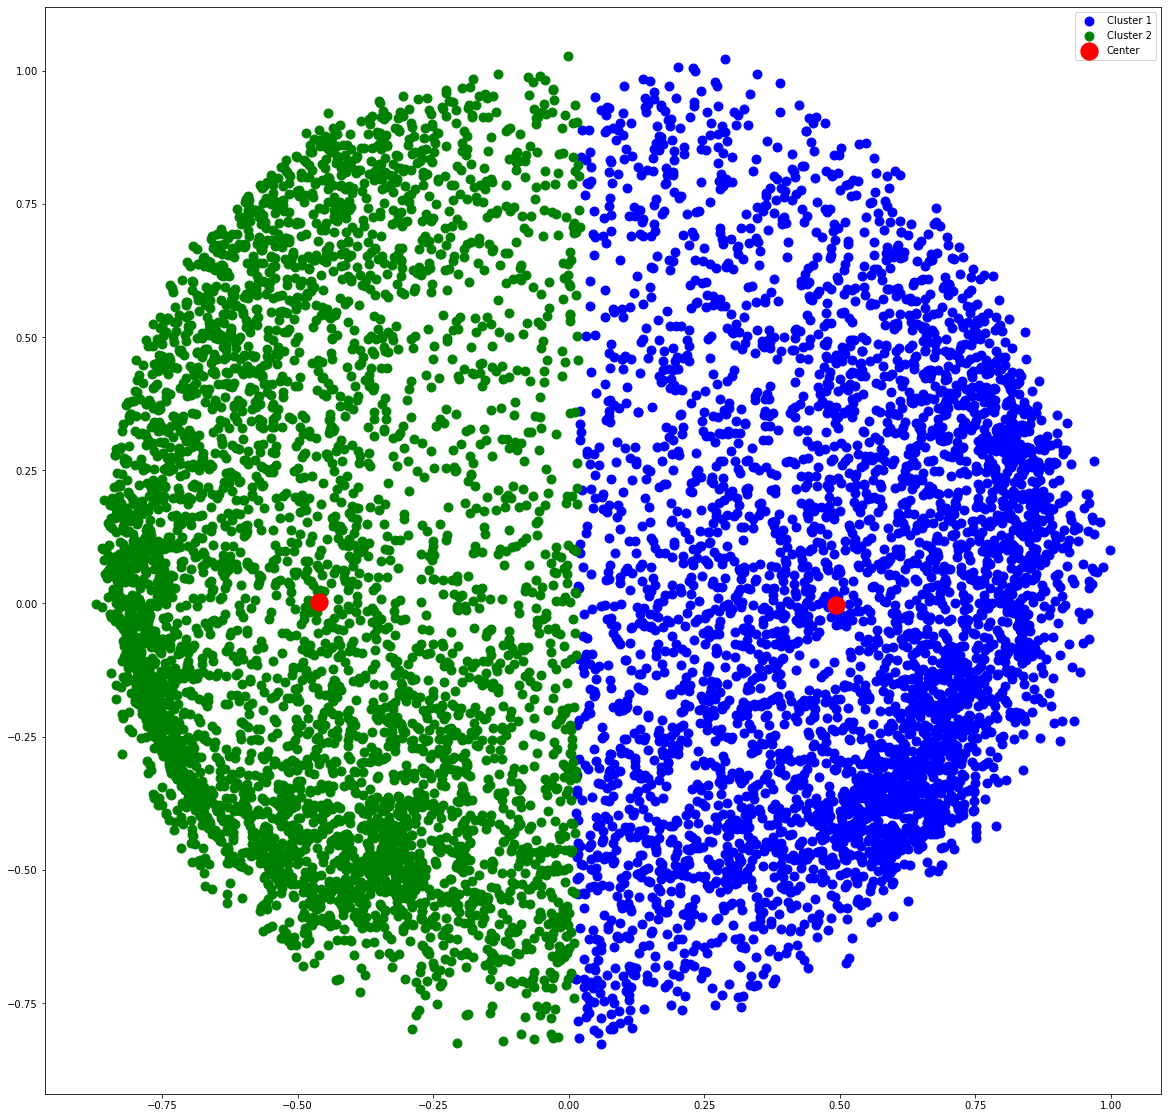

In [20]:
plt.figure(figsize=(20,20))
plt.scatter(df_principal['Feature_1'][label==0],df_principal['Feature_2'][label==0],s=80,c='blue',label='Cluster 1')
plt.scatter(df_principal['Feature_1'][label==1],df_principal['Feature_2'][label==1],s=80,c='green',label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Center')
plt.legend()
plt.show()

<b>Let's try K-mean clustering with K equals to 5</b>

In [21]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(df_principal)
label=kmeans.labels_

In [22]:
kmeans.predict(df_principal)
print(kmeans.cluster_centers_)

[[ 0.5141084  -0.27416177]
 [-0.66343631 -0.0666209 ]
 [-0.35378374  0.60892445]
 [-0.22150425 -0.4239073 ]
 [ 0.5743565   0.3416679 ]]


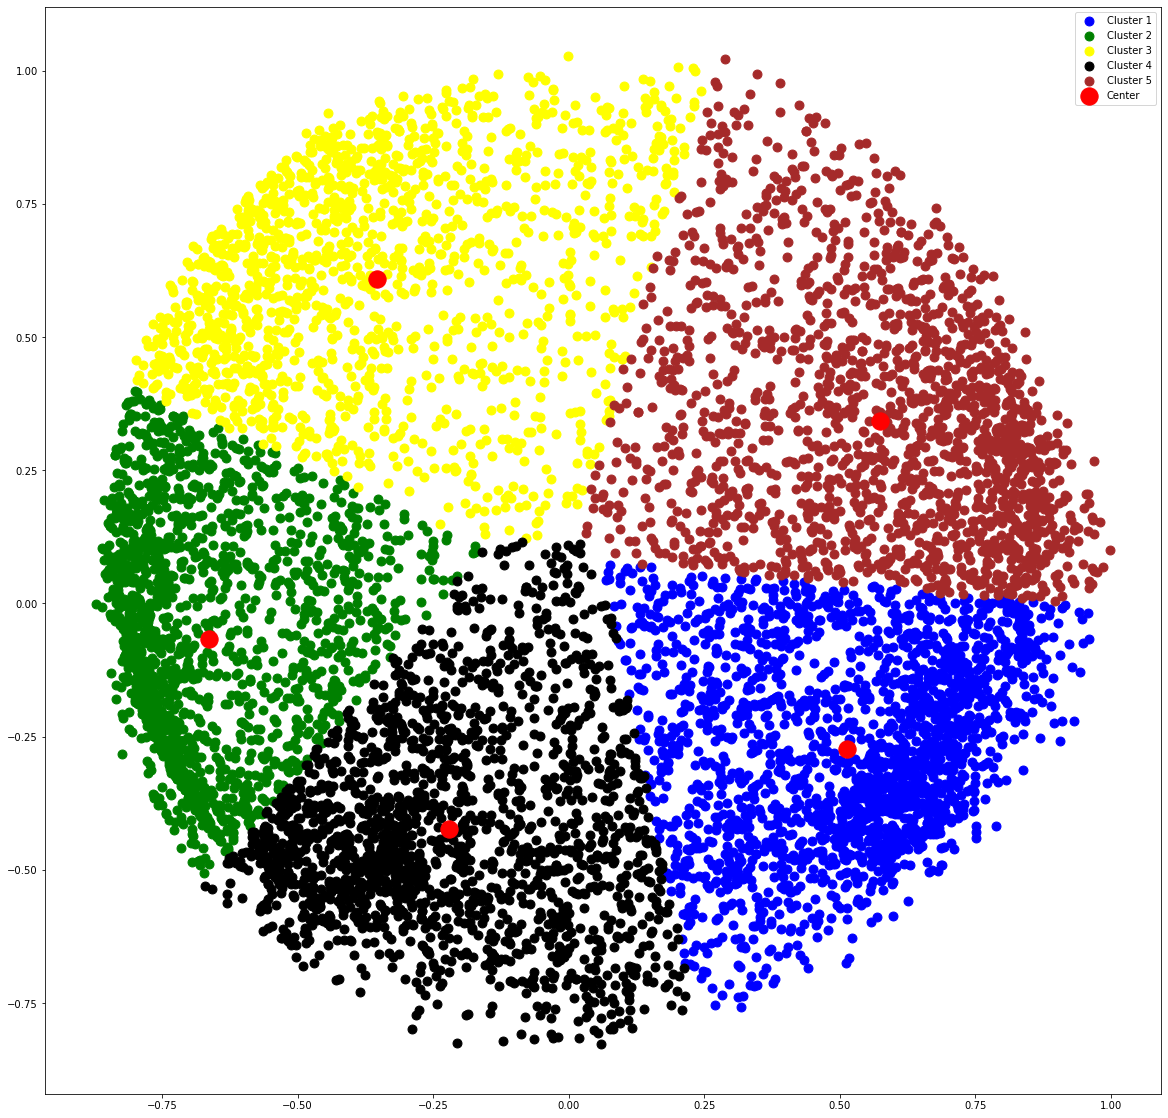

In [23]:
plt.figure(figsize=(20,20))
plt.scatter(df_principal['Feature_1'][label==0],df_principal['Feature_2'][label==0],s=80,c='blue',label='Cluster 1')
plt.scatter(df_principal['Feature_1'][label==1],df_principal['Feature_2'][label==1],s=80,c='green',label='Cluster 2')
plt.scatter(df_principal['Feature_1'][label==2],df_principal['Feature_2'][label==2],s=80,c='yellow',label='Cluster 3')
plt.scatter(df_principal['Feature_1'][label==3],df_principal['Feature_2'][label==3],s=80,c='black',label='Cluster 4')
plt.scatter(df_principal['Feature_1'][label==4],df_principal['Feature_2'][label==4],s=80,c='brown',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Center')
plt.legend()
plt.show()

# <u>6. Selection of the best K values</u>

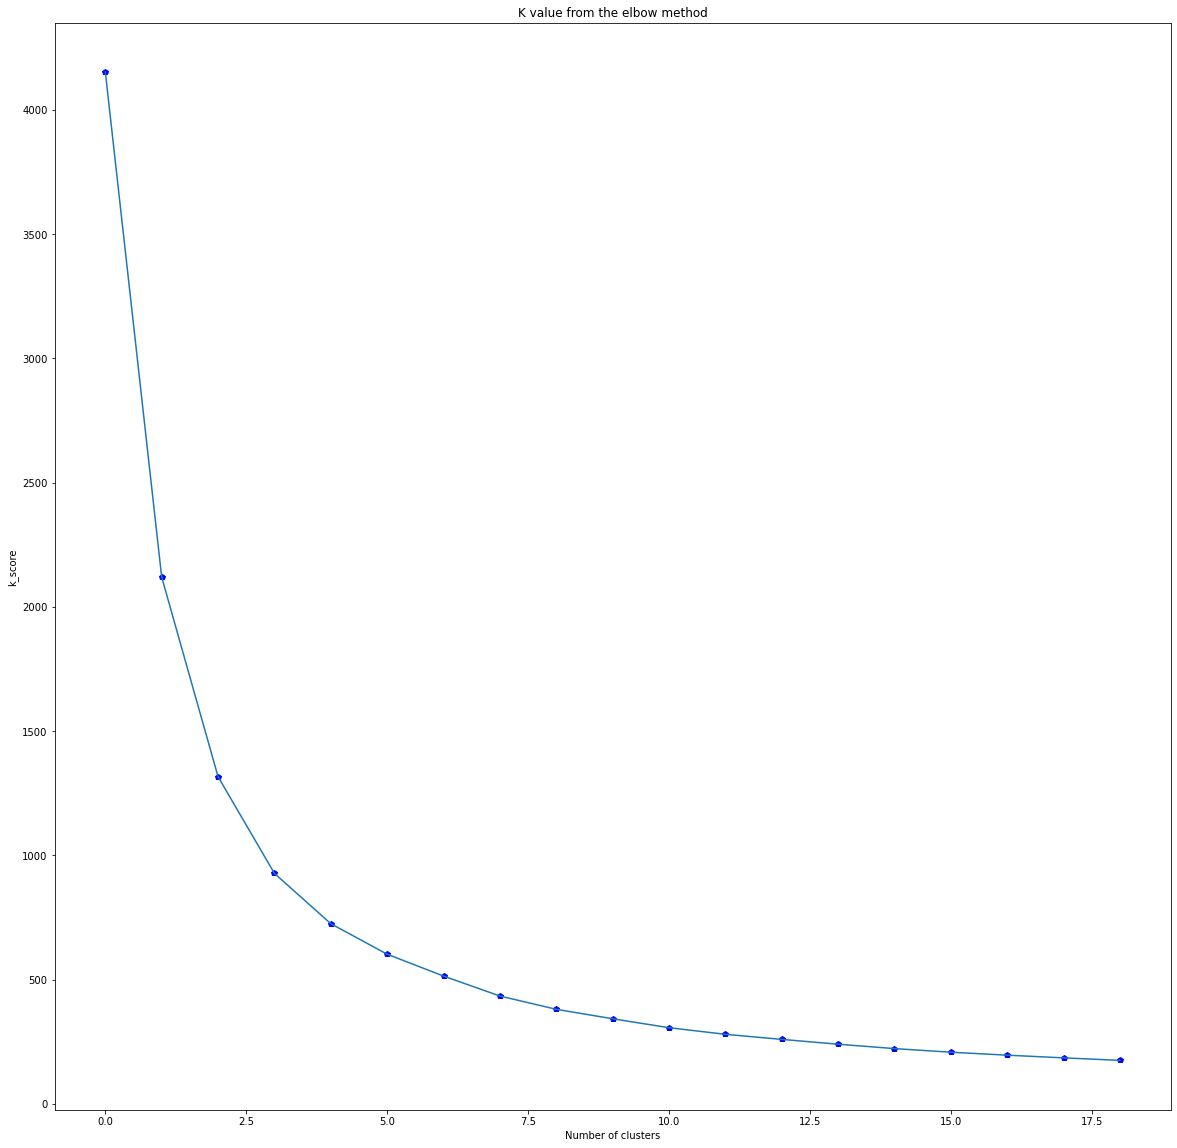

In [24]:
# Let's pick the number of clusters from the elbow method

k_score=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_principal)
    k_score.append(kmeans.inertia_)
plt.figure(figsize=(20,20))
plt.plot(k_score,'bp')
plt.plot(k_score)
plt.title('K value from the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('k_score')
plt.show()

<b>Apparently, the linear distorsion starts at the k value around 8</b>

In [25]:
kmeans=KMeans(n_clusters=8,random_state=0)
kmeans.fit(df_principal)
label=kmeans.labels_

In [26]:
kmeans.predict(df_principal)

array([6, 5, 0, ..., 7, 6, 0])

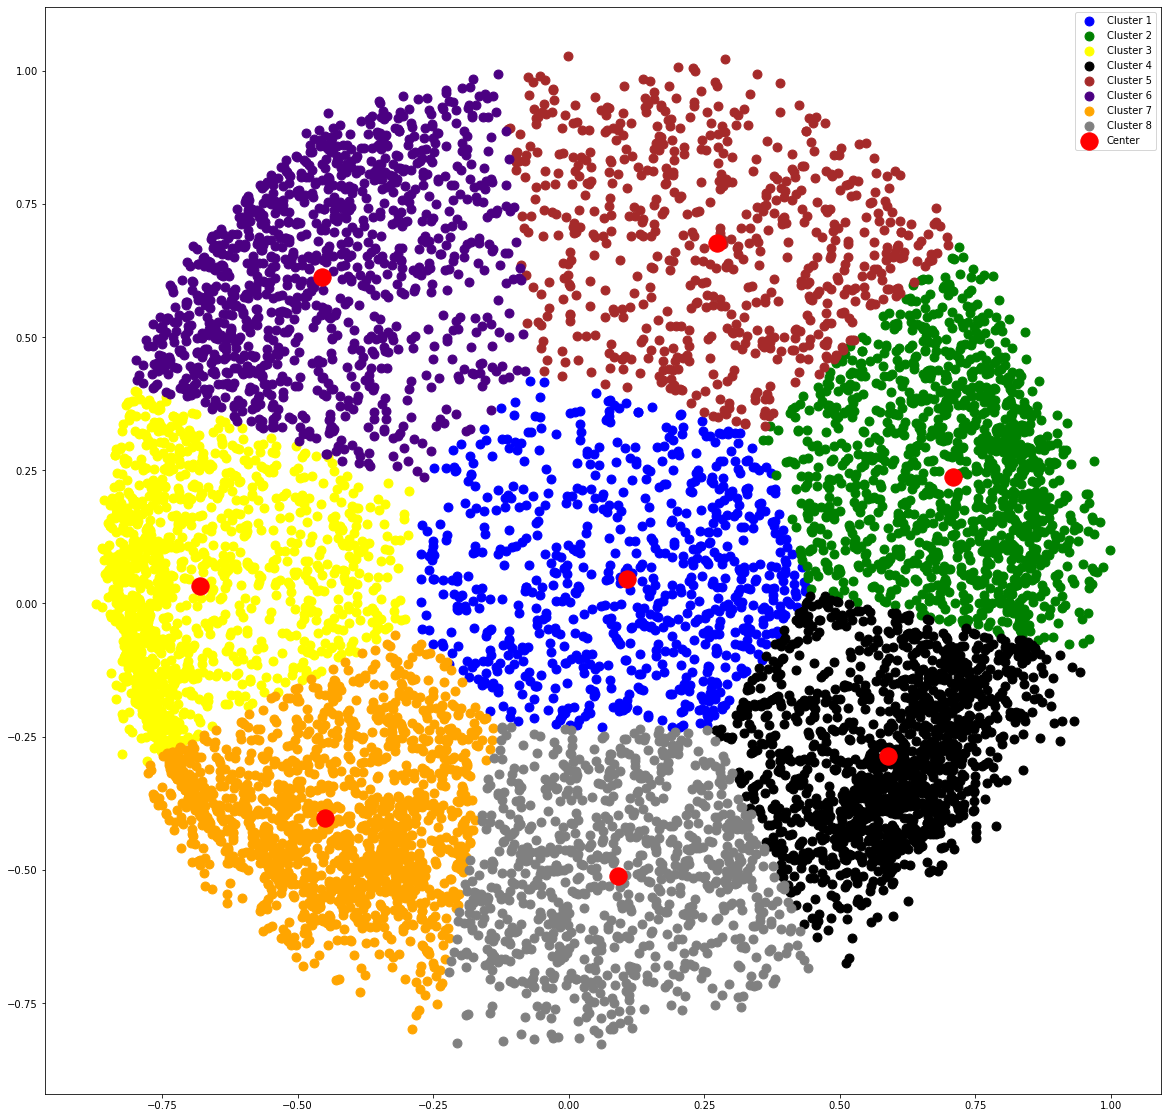

In [27]:
plt.figure(figsize=(20,20))
plt.scatter(df_principal['Feature_1'][label==0],df_principal['Feature_2'][label==0],s=80,c='blue',label='Cluster 1')
plt.scatter(df_principal['Feature_1'][label==1],df_principal['Feature_2'][label==1],s=80,c='green',label='Cluster 2')
plt.scatter(df_principal['Feature_1'][label==2],df_principal['Feature_2'][label==2],s=80,c='yellow',label='Cluster 3')
plt.scatter(df_principal['Feature_1'][label==3],df_principal['Feature_2'][label==3],s=80,c='black',label='Cluster 4')
plt.scatter(df_principal['Feature_1'][label==4],df_principal['Feature_2'][label==4],s=80,c='brown',label='Cluster 5')
plt.scatter(df_principal['Feature_1'][label==5],df_principal['Feature_2'][label==5],s=80,c='indigo',label='Cluster 6')
plt.scatter(df_principal['Feature_1'][label==6],df_principal['Feature_2'][label==6],s=80,c='orange',label='Cluster 7')
plt.scatter(df_principal['Feature_1'][label==7],df_principal['Feature_2'][label==7],s=80,c='grey',label='Cluster 8')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='red',label='Center')
plt.legend()
plt.show()

# <u>7. Use of another validation metric</u>

In [28]:
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_principal)
    
    score=silhouette_score(df_principal,predict, random_state=10)
    print('For n_clusters = {}, silhouette score is {}'.format(k,score))

For n_clusters = 2, silhouette score is 0.4474489634201828
For n_clusters = 3, silhouette score is 0.45808322983691074
For n_clusters = 4, silhouette score is 0.426298785623937
For n_clusters = 5, silhouette score is 0.4003973927431788
For n_clusters = 6, silhouette score is 0.3891061618294583
For n_clusters = 7, silhouette score is 0.40717454808052367
For n_clusters = 8, silhouette score is 0.40248962494769835
For n_clusters = 9, silhouette score is 0.38800904016211313


<b>Silhouette score is high for n_clusters = 3</b>